# 펭귄 몸무게 예측 경진대회
1. train.csv : 학습 데이터

    - id : 샘플 아이디
    - Species: 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이
    - Sex : 펭귄의 성별
    - Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
    - Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
    - Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


2. test.csv : 테스트 데이터
    - train.csv 스키마에서 에서 Body Mass (g) 제외

3. sample_submissoin.csv : 제출 양식
    - id : 샘플 아이디
    - Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)

[데이터 상세 설명](https://allisonhorst.github.io/palmerpenguins/)

    성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다. 남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율. 데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.

In [ ]:
# VB select 역할 = apply
# data["ln"] = data["value"].apply(lambda x: math.log(x / data.iloc[-1]))
# 
# VB where 역할 = loc
# loc 인수는 boolean series 만 넣어주면 됨, 무명함수로 row 넣을 수 있음
#
# loc 문법 2번째
# Generate DataFrame by selecting rows,cols
# rowIdxs = [0,1,10,100]
# cols = ["country", "province", "region_1", "region_2"]
# reviews.loc[rowIdxs,cols]

In [ ]:
# df["col"] === df.loc[:,"col"]

## Init01 Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Init02. Read DataSet

In [245]:
# Read Data 
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

# Print Data Size
print("train 데이터 크기 : %s 행 %s 열" % train_data.shape)
print("test  데이터 크기 : %s 행 %s 열" % test_data.shape)

# Species Data 짧게 변경
train_data["Species"] = train_data["Species"].apply(lambda x : x.split()[0])
test_data["Species"] = test_data["Species"].apply(lambda x : x.split()[0])

# 열이름 변경
col_rename = { 
"Clutch Completion":"Clutch",
"Culmen Length (mm)":"C_Len",
"Culmen Depth (mm)":"C_Dep",
"Flipper Length (mm)":"F_Len",
"Delta 15 N (o/oo)":"15_N",
"Delta 13 C (o/oo)":"13_C",
}
# 열이름 변경
train_data.rename(columns = col_rename, inplace=True)
test_data.rename(columns = col_rename, inplace=True)

# Data 예시출력
display( train_data.head(3) )

train 데이터 크기 : 114 행 11 열
test  데이터 크기 : 228 행 10 열


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g)
0,0,Gentoo,Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap,Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo,Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400


### 결측값 데이터 확인

In [242]:
# pd.isnull(train_data)
print("Train - 결측값 개수")
display(train_data.isnull().sum().loc[lambda x : x>0])
display(train_data.loc[train_data.isnull().sum(axis=1).apply(lambda x : x>0)])
print("--------------------------")
print("Test - 결측값 개수")
display(test_data.isnull().sum().loc[lambda x : x>0])
display(test_data.loc[test_data.isnull().sum(axis=1).apply(lambda x : x>0)])

Train - 결측값 개수


Sex     3
15_N    3
13_C    3
dtype: int64

,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g)
6,6,Adelie,Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie,Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie,Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo,Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie,Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


--------------------------
Test - 결측값 개수


Sex     6
15_N    9
13_C    8
dtype: int64

,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C
27,27,Adelie,Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,46,Adelie,Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,75,Chinstrap,Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,81,Adelie,Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,98,Gentoo,Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,106,Gentoo,Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,152,Gentoo,Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,159,Adelie,Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,175,Adelie,Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,202,Adelie,Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


## Init03. Check Data

### 3.1. 범주형 데이터 목록 보기

In [267]:
for col in cols_categorical: print(col, train_data[col].unique(), sep="\t: ")

Species	: ['Gentoo' 'Chinstrap' 'Adelie']
Island	: ['Biscoe' 'Dream' 'Torgersen']
Clutch	: ['Yes' 'No']
Sex	: ['MALE' 'FEMALE' nan]


## Init04 Visualize Data

In [147]:
# 범주형 열이름, 수치형 열이름 추출
cols_categorical = ["Species","Island","Clutch","Sex"]
cols_numerical = list(filter(lambda x : not x in cols_categorical,list(train_data.columns)))
cols_numerical.remove('id')

print(cols_categorical)
print(cols_numerical)

['Species', 'Island', 'Clutch', 'Sex']
['C_Len', 'C_Dep', 'F_Len', '15_N', '13_C', 'Body Mass (g)']


### 4.0 몸무게와 관련된 범주형 변수 확인
- Male의 몸무게가 Female보다 큰 경향이 있다.
- 몸무게 예측에 Species를 사용할 경우 Island의 데이터는 무시할 수 있다.
- Clutch는 몸무게 예측에서 무시할 수 있다.
- Gento, Chinstrap 펭귄은 한 지역에만 산다.

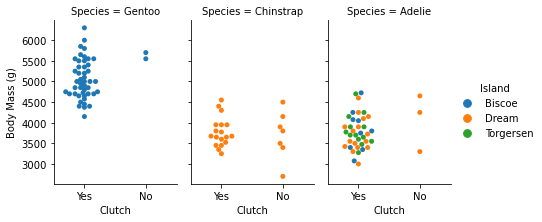

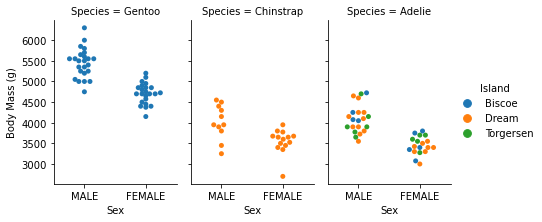

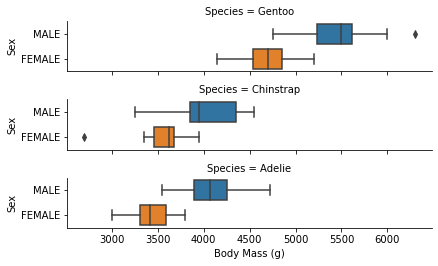

In [272]:
# swarm plot
sns.catplot(x="Clutch", y="Body Mass (g)", col="Species",
            hue="Island", height=3, aspect=0.7, 
            kind="swarm", data=train_data)

# swarm plot
sns.catplot(x="Sex", y="Body Mass (g)", col="Species",
            hue="Island", height=3, aspect=0.7, 
            kind="swarm", data=train_data)

# box plot
sns.catplot(x="Body Mass (g)", y="Sex", row="Species", 
            orient="h", height=1.2, aspect=5, 
            kind="box", data=train_data)

### 4.1. 종에 따른 변수 분포 확인
- 종에 따라 변수 양상이 달라 종에 따른 학습 모델이 필요하다.
- 몸무게는 ['C_Len', 'C_Dep', 'F_Len']와 양의 상관성이 있다.
- 몸무게는 ['15_N', '13_C']와 음의 상관성을 갖는다.

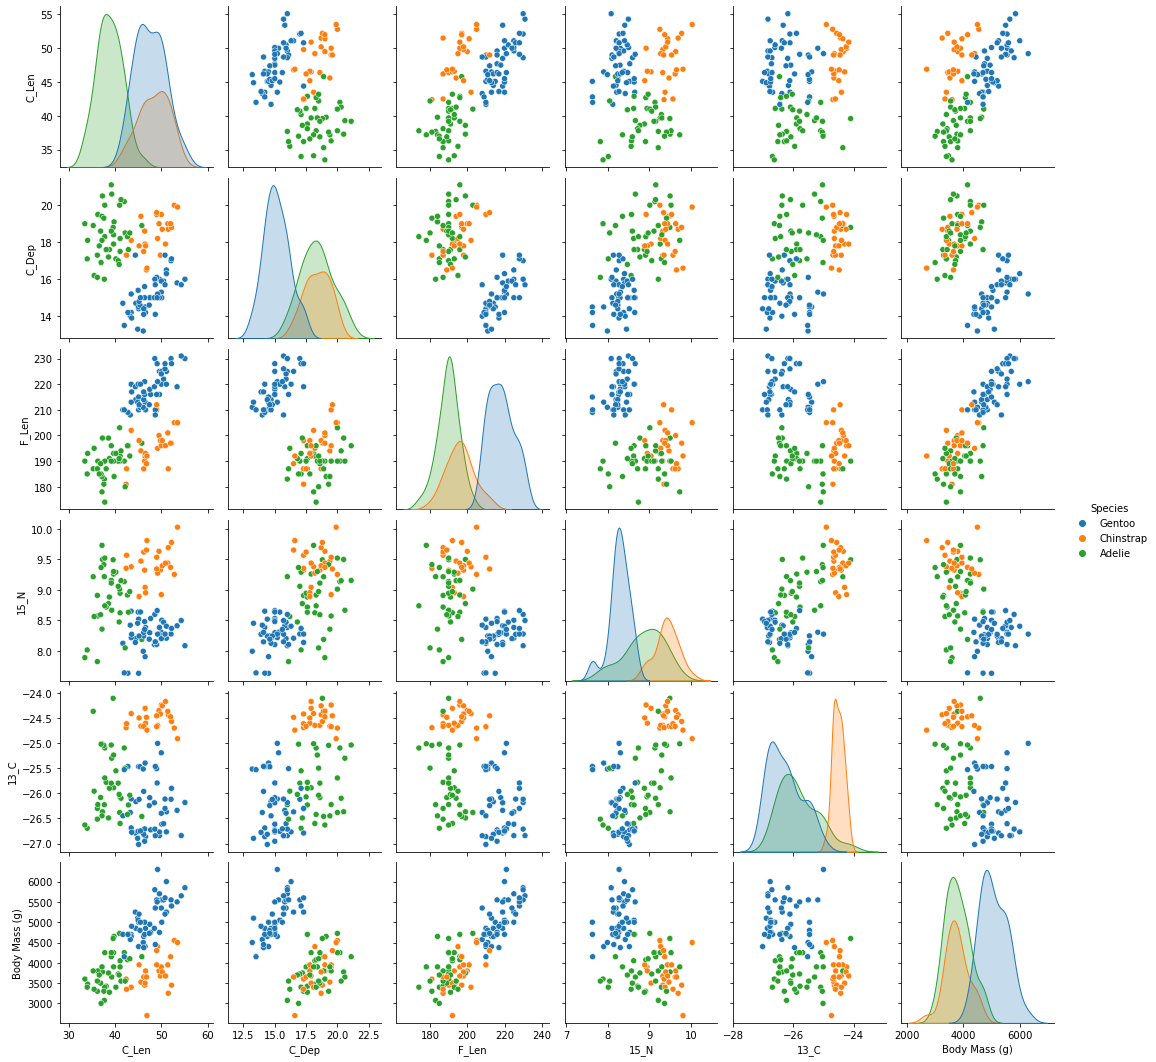

In [172]:
hue_Data = "Species"
sns.pairplot(train_data[[*cols_numerical,hue_Data]], hue=hue_Data)

### 4.4 결측값과 관련된 Data 확인
- 13_C, 15_N의 결측값은 Species,Island 의해 적절히 설명될 수 있을 것 같다.
- 13_C, 15_N의 예측에 Clutch는 변별력 없다. 평균은 다르지만, swarm으로 보면 집단이 작아서 생긴 것임.
- Sex는 Species별 체격 ['C_Len', 'C_Dep', 'F_Len']으로 체워넣는다.

C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


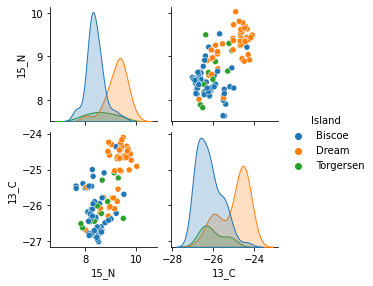

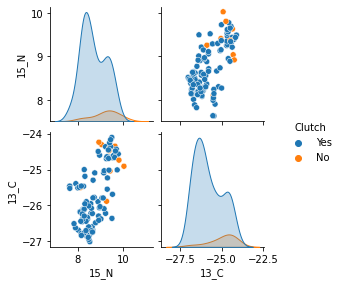

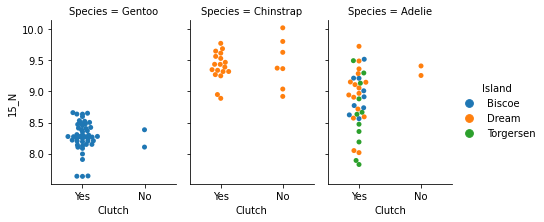

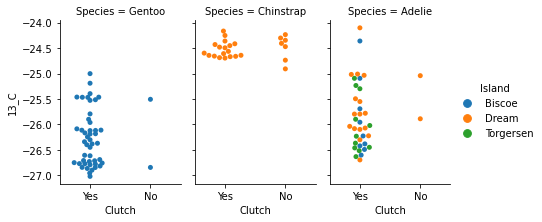

In [284]:
def pair(hue_Data): 
    display( 
        sns.pairplot(train_data[['15_N', '13_C',hue_Data]], hue=hue_Data, height=2) 
    ) 

def cat(y_Data):
    display( 
        sns.catplot(x="Clutch", y=y_Data, col="Species", 
                    hue="Island", height=3, aspect=0.7, kind="swarm", data=train_data) 
   )

pair("Island")
pair("Clutch")
cat("15_N")
cat("13_C")

#### Sex 예측 관련

Gentoo


Chinstrap


Adelie


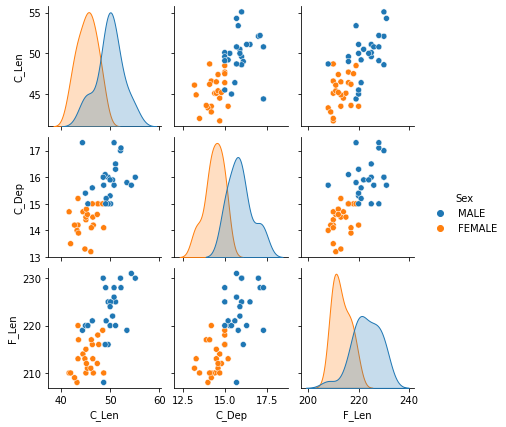

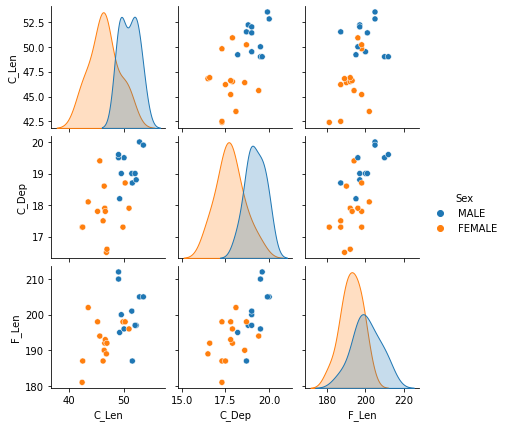

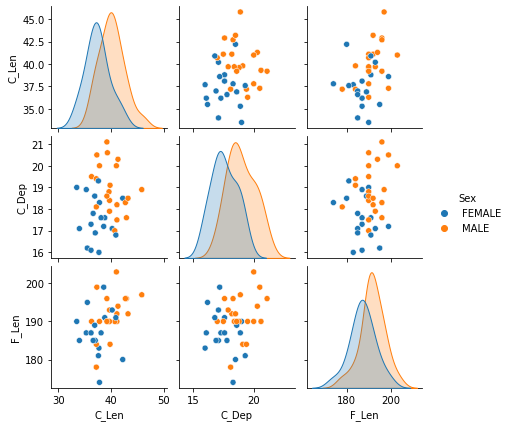

In [305]:
def pair2(Species_Data): 
    cols = ['C_Len', 'C_Dep', 'F_Len', 'Sex', 'Species']
    print(Species_Data)
    display( 
        sns.pairplot(train_data[train_data["Species"] == Species_Data].loc[:,cols], hue="Sex", height=2)
    ) 
    
pair2("Gentoo")
pair2("Chinstrap")
pair2("Adelie")

## Fill Missing Data

## Train ML

## Validate ML

## Write to CSV